## Summative Assessment 1-Question 3

By generating 10,000 searches in R, carry out a simulation experiment for a search engine going through a list of sites for a given key phrase, until the key phrase is found. You should allow your program to input the probability p that any site will contain the key phrase.
* Plot the simulated pdf and calculate its mean and variance, and
* Obtain the simulated conditional distribution of searches when three searches have been carried out without success. Calculate its mean and variance, and satisfy yourself that they are equivalent to the simulated distribution of the complete set.
* As test data assume each site has a 60% chance of containing the key phrase.To satisfy yourself that the Markov memoryless property holds, obtain estimates of

$$
\text{P(X=4}|\text{X>3})\text{ and }\text{P(X=1})\\
\text{P(X=5}|\text{X>3})\text{ and }\text{P(X=2})
$$

### Plot the simulated pdf and calculate its mean and variance

In [17]:
library(tidyverse)
while(TRUE){
    inputProbab <- as.numeric(readline("Enter Valid Probability: "))
    if(is.numeric(inputProbab)&(inputProbab>=0 & inputProbab<=1)){
        break
    }
    cat("\nInvalid Probability only 0<=x<=1")
}
cat("\n\nYou have entered the Probability:",inputProbab)

Enter Valid Probability:  0.3




You have entered the Probability: 0.3

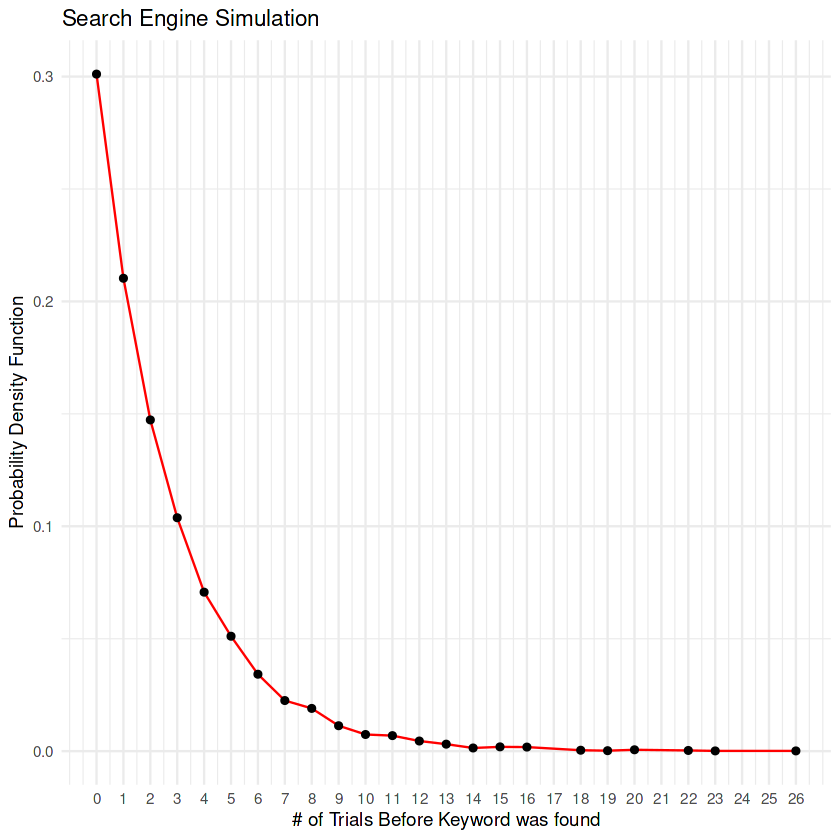

In [21]:
searchEngineSimulator <- rgeom(10000,inputProbab)
mean_og <- mean(searchEngineSimulator)
var_og <- var(searchEngineSimulator)
searchEngineSimulatorDF <- data.frame("N_Failures_Before_Key_is_Found"=searchEngineSimulator)%>%
    group_by(N_Failures_Before_Key_is_Found)%>%
    summarise("Probability_Density_Function"=n()/10000)

ggplot(searchEngineSimulatorDF,mapping = aes(x=N_Failures_Before_Key_is_Found,y=Probability_Density_Function))+
    geom_line(col='red', linewidth=0.5)+
    geom_point()+
    labs(x="# of Trials Before Keyword was found",
        y="Probability Density Function",
        title = "Search Engine Simulation")+
    scale_x_continuous(breaks = seq(min(searchEngineSimulatorDF$N_Failures_Before_Key_is_Found), max(searchEngineSimulatorDF$N_Failures_Before_Key_is_Found), by = 1))+
theme_minimal()

### Obtain the simulated conditional distribution of searches when three searches have been carried out without success. Calculate its mean and variance, and satisfy yourself that they are equivalent to the simulated distribution of the complete set.

In [19]:
searchEngineSimulator_More_3 <- searchEngineSimulator[searchEngineSimulator>3]-3
mean_3 <- mean(searchEngineSimulator_More_3)
var_3 <- var(searchEngineSimulator_More_3)
cat("\nOriginal Mean: ",mean_og,"\nMean given that 3 searches was unsuccesful: ",mean_3)
cat("\n\nOriginal Variance: ",var_og,"\nVariance given that 3 searches was unsuccesful: ",var_3)


Original Mean:  2.314 
Mean given that 3 searches was unsuccesful:  3.338004

Original Variance:  7.547959 
Variance given that 3 searches was unsuccesful:  7.194116

### As test data assume each site has a 60% chance of containing the key phrase.To satisfy yourself that the Markov memoryless property holds, obtain estimates of

$$
\text{P(X=4}|\text{X>3})\text{ and }\text{P(X=1})\\
\text{P(X=5}|\text{X>3})\text{ and }\text{P(X=2})
$$


First let us prove that the Markov's Property Holds in the context of the Geometric Distribution.

Given a probability of success p, s.t. $p \in [0,1]$, since within our program we are currently using the geometric distribution, let us use the given geometric distribution equation which is $P(X=x) = q^{x-1}p$. To prove Markov's Property we need to show that:
$$P(X=x+n | X>x) = P(X=n)$$
Let us use the definition of Conditional Probabilities:
$$P(X=x+n | X>x) = \frac{P(X=x+n \cap X>x)}{P(X>x)}$$
We know that the intersection of $P(X=x+n \cap X>x)$ is simply $P(X=x+n)$, therefore we can say that:
$$P(X=x+n | X>x) = \frac{P(X=x+n)}{P(X>x)}$$
Now let us use the definition of the Geometric Distribution where the Probability density function is denoted as $P(X=x) = q^{x-1}p$ whilst the cumulative probability distribution is denoted as $P(X<=x) = 1-(1-p)^x$, with this definition we can say that $P(X>x) = 1-(1-(1-p)^x) = q^x$, therefor our equation is:
$$P(X=x+n | X>x) = \frac{q^{x+n-1}p}{q^x}$$
$$P(X=x+n | X>x) = q^{n-1}p$$
Since we know that $P(X=n)=q^{n-1}p$ by the definition of the Geometric Distribution Probability Density Function we have shown that:
$$P(X=x+n | X>x) = P(X=n)$$

Now Let us use R to prove that they are inded equal.

In [28]:
p <- 0.6
probability_4_given_3 <- (((1-p)^(4-1))*p)/(1-p)^3
probability_1 <- (((1-p)^(1-1))*p)

probability_5_given_3 <- (((1-p)^(5-1))*p)/(1-p)^3
probability_2 <- (((1-p)^(2-1))*p)

cat("P(X=4|X>3): ",probability_4_given_3," P(X=1): ",probability_1)
cat("\nP(X=5|X>3): ",probability_5_given_3," P(X=2): ",probability_2)

P(X=4|X>3):  0.6  P(X=1):  0.6
P(X=5|X>3):  0.24  P(X=2):  0.24